In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [24]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


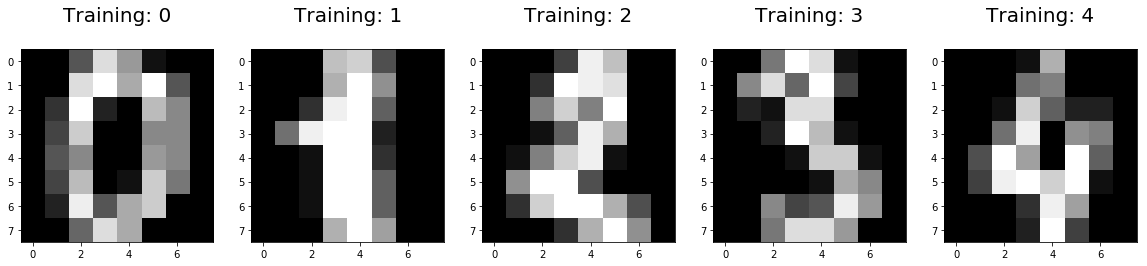

In [25]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# Continuing with the Capstone project from this point

Continuing with the task from this point. Please note I kept using the load_digits dataset (reduced version of mnist) since the mnist dataset (with 60k rows) kept giving me http 500 errors when I tried to retrieve it. Principles would have been applied the same to that dataset as the load_diggits dataset. 

### splitting the data between train, test and development sets 60/20/20

In [26]:
from sklearn.model_selection import train_test_split

# split 1
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42) # keeping seed the same

# split 2 to generate validation/development set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # keeping seed the same


In [27]:
digits.target # inspecting the target variable array

array([0, 1, 2, ..., 8, 9, 8])

In [28]:
digits.data  # inspecting the independent variable arrays

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(1077, 64)
(1077,)
(360, 64)
(360,)
(360, 64)
(360,)


### For purposes of this exercise I have selected logistics regression and the random forest decision tree

The reason I selected these two modles was to see the difference between a model that assumes linear relationship (regression) with a model that does not assume it (random forest).I also want to see the impact of ensemble learning (many decision trees based on averaging out selection of random varialbles {random forest}) in this instance vs model that only works on an iteration approach (regression).

### Logistic regression model

In [30]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter = 50)

logisticRegr.fit(X_train, y_train) # viewing list of parameters to potentially change. In the case of the logistics regression
# I did not change any parameters since it did not chnage the score or accuracy to the test or development sets


C:\Users\baren\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baren\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
pred_y = logisticRegr.predict(X_test)
pred_y[:10]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

#### producing predictions of target variable based on test set

In [32]:
score_test = logisticRegr.score(X_test, y_test)
print(score_test)  # regression model provides score/accuracy to development set of 95.27%

0.9527777777777777


In [33]:
score_val = logisticRegr.score(X_val, y_val)
print(score_val)  # regression model provides score/accuracy to development set of 95.27% (same to test set) indicating that there might be no overfitting to the training data

0.9527777777777777


#### Creating confusion matrix and determining metrics for the logistcs regression model

In [34]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pred_y)
cnf_matrix

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 27,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  4, 34]], dtype=int64)

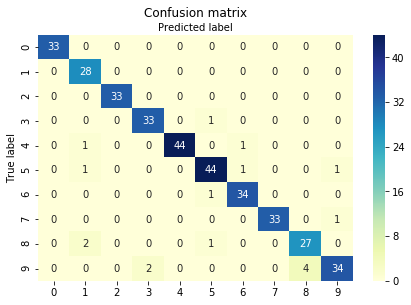

In [35]:
# creating the confusion matrix with visuals
import seaborn as sns # adding additional visual library

ax = plt.subplot()

# create heatmap with labels of different categories in confusion matrix
sns.heatmap(cnf_matrix, annot=True, ax = ax, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
# creating labels for header, true and predicted labels
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### calculating the accuracy, precision, recall and f1 scores

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_y))
print("Precision:",metrics.precision_score(y_test, pred_y, average = None))
print("Recall:",metrics.recall_score(y_test, pred_y, average = None))
print("F1 score:",metrics.f1_score(y_test, pred_y, average = None))

Accuracy: 0.9527777777777777
Precision: [1.         0.875      1.         0.94285714 1.         0.93617021
 0.94444444 1.         0.87096774 0.94444444]
Recall: [1.         1.         1.         0.97058824 0.95652174 0.93617021
 0.97142857 0.97058824 0.9        0.85      ]
F1 score: [1.         0.93333333 1.         0.95652174 0.97777778 0.93617021
 0.95774648 0.98507463 0.8852459  0.89473684]


Taking the above metrics as well as confucion matrix into consideration it seems that the class of number 9 is the one struggled most with. In this instance 34 times the number was correctly assumed as the number 9, but there were 4 instances the model assumed it was number 8 and 2 instances as the number 3, leading to the recall of 85%. Other classes struggled with was the number 8 and 5 where in each instance the predictions for these were wrong 3 times. The predicted class of 1 also had the lowest precision since there  were 4 instances where the number was predicted as 1 but the actual labels were 4,5 and 8. 
Classes 1, 8 and 9 also had the lowest f1 scores.

### Starting with random forest model

#### Creating a function to loop through various depth levels and to plot the scores between the test and development sets. In this instance i kept n_estimators at 100 and random states at 7 while only changing the max depth levels between 5 to 20 with increments of 3.

In [37]:
from sklearn.ensemble import RandomForestClassifier

def rf_tree_model(x, y, test_X, test_y, val_X, val_y):
    
    # creating empty list to store the scores on the different sets (test and development)
    
    score_test = []
    score_development = []
    N = range(5, 21, 3)
    
    for i in N: # ranging depths between 5 to 20 with increments of 3
        
        RandomForest =  RandomForestClassifier(max_depth = i, n_estimators = 100, random_state = 7).fit(x, y)
        pred_y_rf = RandomForest.predict(test_X)
               
        number1 = RandomForest.score(test_X, test_y)
        number2 = RandomForest.score(val_X, val_y)
        
        score_test.append(number1)
        score_development.append(number2) 
        
    plt.plot(N, score_test)
    plt.plot(N, score_development)
    plt.title('Scores between test and development set')
    plt.ylabel('Score')
    plt.xlabel('Max Depth Level')
    plt.legend(['score to test', 'score to development'])
    plt.ylim(0.8, 1)
    plt.xlim(5, 20)
    
    return score_test, score_development

([0.9305555555555556,
  0.9694444444444444,
  0.9694444444444444,
  0.9638888888888889,
  0.9638888888888889,
  0.9638888888888889],
 [0.925,
  0.9666666666666667,
  0.9722222222222222,
  0.9694444444444444,
  0.9722222222222222,
  0.9722222222222222])

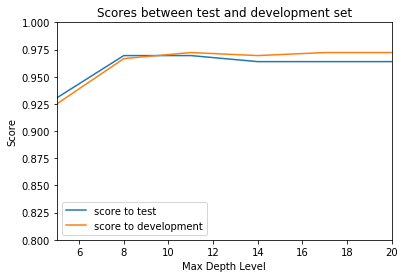

In [38]:
# running the function to inspect best scores based on tree depth for both the test and development sets
rf_tree_model(X_train, y_train, X_test, y_test, X_val, y_val)

Based on the above I will select max depth equating to 17 since the score is best here on the development set (97.2%) and the second best on the test set (96.38%) so as to select a model that is not overfitting on the training data.

#### Creating random forest with max_depth of 17.

In [39]:
RandomForest =  RandomForestClassifier(max_depth = 17, n_estimators = 100, random_state = 7).fit(X_train, y_train)
pred_y_rf = RandomForest.predict(X_test)
               
print(RandomForest.score(X_test, y_test)) # confirming that figures matches the one ran in the function
print(RandomForest.score(X_val, y_val)) # confirming that figures matches the one ran in the function      

0.9638888888888889
0.9722222222222222


In [40]:
pred_y_rf[:10] # inspecting some of the predictions

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

#### Creating confusion matrix and calculating metrics for random forest model with max depth of 17

In [41]:
cnf_matrix = metrics.confusion_matrix(y_test, pred_y_rf)
cnf_matrix

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  1,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 37]], dtype=int64)

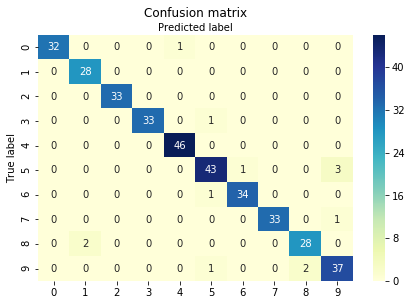

In [42]:
# creating the confusion matrix with visuals
import seaborn as sns # adding additional visual library

ax = plt.subplot()

# create heatmap with labels of different categories in confusion matrix
sns.heatmap(cnf_matrix, annot=True, ax = ax, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
# creating labels for header, true and predicted labels
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### calculating the accuracy, precision, recall and f1 scores

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_y_rf))
print("Precision:",metrics.precision_score(y_test, pred_y_rf, average = None))
print("Recall:",metrics.recall_score(y_test, pred_y_rf, average = None))
print("F1 score:",metrics.f1_score(y_test, pred_y_rf, average = None))

Accuracy: 0.9638888888888889
Precision: [1.         0.93333333 1.         1.         0.9787234  0.93478261
 0.97142857 1.         0.93333333 0.90243902]
Recall: [0.96969697 1.         1.         0.97058824 1.         0.91489362
 0.97142857 0.97058824 0.93333333 0.925     ]
F1 score: [0.98461538 0.96551724 1.         0.98507463 0.98924731 0.92473118
 0.97142857 0.98507463 0.93333333 0.91358025]


Taking the above metrics as well as confusion matrix into consideration it seems that the classes of numbers 9, 8 and 5 was the numbers struggled most with. Here these numbers had the lowest precision  as well as some of the lowest recall ratings. Classes 8, 9 and 5 also has the lowest f1 scores.